# 2장 신경망의 수학적 구성 요소

In [1]:
# 코드 2-1 케라스에서 MNIST 데이터셋 적재하기
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [2]:
# 훈련 데이터
print(train_images.shape)
print(len(train_labels))
print(train_labels)

(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]


In [3]:
# 테스트 데이터
print(test_images.shape)
print(len(test_labels))
print(test_labels)

(10000, 28, 28)
10000
[7 2 1 ... 4 5 6]


In [4]:
# 코드 2-2 신경망 구조
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

W0919 09:42:19.861973  6788 deprecation_wrapper.py:119] From C:\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0919 09:42:19.896881  6788 deprecation_wrapper.py:119] From C:\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0919 09:42:19.901932  6788 deprecation_wrapper.py:119] From C:\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
# 코드 2-3 컴파일 단계
network.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

W0919 09:44:59.987781  6788 deprecation_wrapper.py:119] From C:\Python\Python37\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0919 09:45:00.048588  6788 deprecation_wrapper.py:119] From C:\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



In [6]:
# 코드 2-4 이미지 데이터 준비하기
# 0과 1 사이의 값을 가지는 float32 타입의 (60000, 28 * 28) 크기인 배열로 바꾸기.
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [7]:
# 코드 2-5 레이블 준비하기
from keras.utils import to_categorical

# 목적변수(Y)를 카테고리화
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### 결과값은 2가지가 나온다. loss(손실), acc(정확도)

In [13]:
# 학습시키기
# epochs = 5 : 데이터 전체를 기준으로 5번 반복 학습.
# batch_size = 128 : 한번 학습시킬 때, 데이터 전체 중 128개만 학습. (컴퓨터 메모리 문제 때문, 적용)
# ex) 전체 데이터 수 : 200, batch_size = 100, epoch = 2  ==>> 100개 샘플의 학습을 총 4번 시행.
network.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
60000/60000 [==============================] - 6s 102us/step - loss: 0.0081 - acc: 0.9980
Epoch 2/5
60000/60000 [==============================] - 6s 103us/step - loss: 0.0065 - acc: 0.9982
Epoch 3/5
60000/60000 [==============================] - 7s 109us/step - loss: 0.0049 - acc: 0.9988
Epoch 4/5
60000/60000 [==============================] - 7s 116us/step - loss: 0.0039 - acc: 0.9990 3s - loss: 0.0037 - acc:  - ETA: 3s - loss: 0.
Epoch 5/5
60000/60000 [==============================] - 7s 111us/step - loss: 0.0034 - acc: 0.9991


In [14]:
# 테스트하기
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 53us/step
test_acc: 0.9817


## 신경망을 위한 데이터 표현

In [5]:
# 값 하나 : 스칼라, 0D텐서
import numpy as np
x = np.array(12)
x

array(12)

In [6]:
x.ndim

0

In [7]:
# 숫자의 배열 : 벡터, 1D텐서
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [9]:
x.ndim

1

In [10]:
# 벡터의 배열 : 행렬, 2D텐서
x = np.array([[5, 78, 2, 34 ,0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

In [11]:
# 위의 행렬들을 하나의 새로운 배열로 합치면 숫자가 채워진 직육면체. 3D텐서
x = np.array([[[5, 78, 2, 34 ,0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34 ,0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34 ,0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

- 보통 딥러닝에선 0D ~ 4D를 다룸, 동영상 데이터를 다룰 경우 5D까지 가기도 함.
- 축의 개수(랭크) : 3D 텐서에는 3개의 축, 행렬에서는 2개의 축. numpy 라이브러리의 ndim에 저장되어 있음.
- 크기(shape) : 행렬의 크기 : (3, 5), 3D 텐서의 크기 : (3, 3, 5), 벡터 : (5, ), qoduf tmzkffk : ()
- 데이터 타입(numpy에서는 dtype) : 텐서에 포함된 데이터의 타입 ex) float32, float64, uint8

In [13]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('train_images의 텐서 : ', train_images.ndim)
print('train_images의 크기 : ', train_images.shape)
print('train_images의 데이터 타입 : ', train_images.dtype)

train_images의 텐서 :  3
train_images의 크기 :  (60000, 28, 28)
train_images의 데이터 타입 :  uint8


- 위 배열은 8비트 정수형 3D 텐서. 정확하게는 28 * 28 크기의 정수 행렬 6만 개가 있는 배열. 각 행렬은 하나의 흑백 이미지고, 행렬의 각 원소는 0에서 255 사이의 값을 가진다.

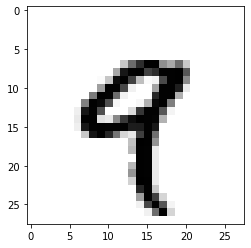

In [16]:
# 코드 2-6 다섯 번째 이미지 출력하기
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [17]:
# 슬라이싱을 통하여 (90, 28, 28) 크기의 배열 만들기.
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [18]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [20]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [21]:
#이미지의 우측 하단 14 * 14 픽셀 선택
my_slice = train_images[:, 14:, 14:]
my_slice = train_images[:, 7:-7, 7:-7]

In [23]:
# 배치 데이터 - 크기가 128인 배치 하나는 다음과 같음
batch = train_images[:128]
# 그 다음 배치는 아래와 같음.
batch = train_images[128:256]
# n번째 배치는 다음과 같음.
n = 8
batch = train_images[128 * n:128*(n+1)]
# 첫번째 축(0번 축)을 배치 축 또는 배치 차원이라고 부름.

- 벡터 데이터 : (samples, features) 크기의 2D 텐서
- 시계열 데이터 또는 시퀀스 데이터 : (samples, timesteps, features) 크기의 3D 텐서
- 이미지 : (samples, height, width, channels) 또는 (samples, channels, height, width) 크기의 4D 텐서
- 동영상 : (samples, frames, height, width, channels) 또는 (samples, frames, channels, height, width) 크기의 5D 텐서

- 예 :
1. 사람의 나이, 우편 번호, 소득으로 구성된 인구 통계 데이터, 각 사람은 3개의 값을 가진 벡터로 구성되고 10만 명이 포함된 전체 데이터셋은 (100000, 3)크기의 텐서에 저장.
2. (공통 단어 2만 개로 만든 사전에서) 각 단어가 등장한 횟수로 표현된 텍스트 문서 데이터 셋. 각 문서는 2만 개의 원소(사전에 있는 단어마다 하나의 원소에 대응합니다)를 가진 벡터로 인코딩될 수 있습니다. 500개의 문서로 이루어진 전체 데이터셋은 (50, 20000) 크기의 텐서로 저장됩니다.

- 시계열 데이터 : 관례적으로 시간 축은 항상 두 번쨰 축(인덱스가 1인 축)이다.
- 예 :
- 주식 가격 데이터셋 : 1분마다 현재 주식 가격, 지난 1분 동안에 최고 가격과 최소 가격을 저장한다. 1분마다 데이터는 3D 벡터로 인코딩되고 하루 동안의 거래는 (390, 3) 크기의 2D 텐서로 인코딩 된다. 250일치의 데이터는 (250, 390, 3) 크기의 3D 텐서로 저장될 수 잇다. 여기에서 1일치 데이터가 하나의 샘플이 된다.

- 이미지 데이터 : (높이, 너비, 채널)의 3차원으로 이루어짐. 흑백 이미지는 하나의 컬러 채널만을 가지고 있어 2D 텐서로 저장될 수 있지만 이미지 텐서는 항상 3D로 저장. 흑백 이미지의 경우 컬러 채널의 차원 크기는 1이다. 256 * 256 크기의 흑백 이미지에 대한 128개의 배치는 (128, 256, 256, 1). 컬러가 있다면, (128, 256, 256, 3).
- 텐서의 크기를 지정하는 방식은 두 가지. 그 중 텐서플로 방식으로 기억해보자. (채널 마지막 방식) (samples, height, width, color_depth)

- 비디오 데이터
- 프레임 (height, width, color_depth)의 3D 텐서로 저장될 수 있기 때문에 프레임의 연속은 (frames, height, width, color_depth)의 4D 텐서로 저장될 수 잇다. 여러 비디오의 배치는(samples, frames, height, width, color_depth)의 5D 텐서로 저장될 수 있다.
- 예 :
- 60초 짜리 144 * 256 유튜브 비디오 클립을 초당 4프레임으로 샘플링하면 240프레임이 된다. 이런 비디오 클립을 4개 가진 배치는 (4, 240, 144, 256, 3) 크기의 텐서에 저장될 것이다.

## 신경망의 톱니바퀴 : 텐서 연산

- 케라스의 층은 다음과 같이 생성함.
- keras.layers.Dense(512, activation = 'relu')


- 2D 텐서를 입력으로 받고 입력 텐서의 새로운 표현인 또 다른 2D 텐서를 반환하는 함수
- output = relu(dot(W, input) + b)  :  W는 2D 텐서고, b는 벡터. 둘 모두 층의 속성이다.

- 위 식에서는 3개의 텐서 연산이 있다. 1. 입력 텐서와 텐서 W 사이의 점곱(dot), 2. 점곱의 결과인 2D 텐서와 벡터 b 사이의 덧셈(+), 마지막으로 relu(렐루) 연산이다. # relu(x) = max(x,0). : x가 0보다 크면 0을 리턴, 0보다 작으면 0을 리턴.